In [1]:
from tdi import *

In [50]:
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "Helvetica"
})

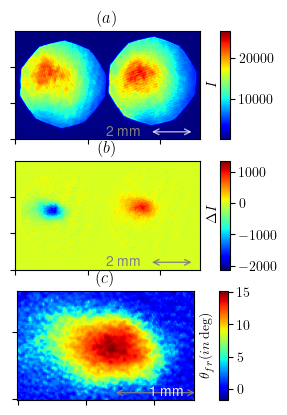

In [105]:
sifdata = get_sifdata("..\\Data\\SampleData\\5.0A.sif")
sifData = np.transpose(sifdata[2:,:, 0:300], axes=[0,2,1]) # cropping the image
CONTOURS, BINARIZE_MASK , SMOOTH_MASK_NORMED = get_contours(sifData)

f1f2, p1p2, A1, A2, mx1, mx2 =get_splitting_ratio(sifData, CONTOURS, BINARIZE_MASK)

flImg = sifData[4]  # Fluoroscence image
aImg = sifData[5] # Image with atom and probe
pImg = sifData[6] # Image with  probe
bImg = sifData[-1] # Image with background
dImg = aImg-pImg


trans1, trans2 = f1f2/(1+f1f2), 1/(1+f1f2)
p1, p2 = get_croppedImages(pImg, CONTOURS)
d1, d2 = get_croppedImages(dImg, CONTOURS)
ds = trans1*d1 + trans2*d2
d1s = d1-ds
d2s = d2-ds

def dI2ang(dI, θp=np.deg2rad(3.6)):
    sign = np.sign((dI + np.sin(2*θp)**2))
    return 2*θp - np.arcsin(sign*np.sqrt(np.abs((dI + np.sin(2*θp)**2))))

d1a = dI2ang(d1s/p1, θp=np.deg2rad(3.538))
d2a = dI2ang(d2s/p2, θp=np.deg2rad(3.801))
dc = ((d2a-d1a)[100:180, 30:160])/2

fig = plt.figure()
ax1 = plt.subplot(311)
ax2 = plt.subplot(312, sharex = ax1)
ax3 = plt.subplot(313)

im1 = ax1.imshow(aImg, origin="lower", cmap="jet")
divider1 = make_axes_locatable(ax1)
cax1 = divider1.append_axes('right', size='5%', pad=0.2)
cb1 = fig.colorbar(im1, cax=cax1, orientation='vertical')
cb1.ax.locator_params(nbins=5)
ax1.set_title("$(a)$")
ax1.yaxis.set_label_position("right")
ax1.set_ylabel("$ I $")
ax1.annotate(text="", xy=(370,20), xytext=(370+2/0.016,20), arrowprops=dict(arrowstyle='<->', color="white", alpha=0.7), color="gray")
ax1.annotate(text="2 mm", xy=(300,20), xytext=(300,20), arrowprops=dict(arrowstyle='<->', color="white", alpha=0.0), color="gray", ha="center", va="center")
ax1.set_xticklabels([])
ax1.set_yticklabels([])
ax2.set_yticklabels([])
ax3.set_xticklabels([])
ax3.set_yticklabels([])
im2 = ax2.imshow(dImg, origin="lower", cmap="jet")
divider2 = make_axes_locatable(ax2)
cax2 = divider2.append_axes('right', size='5%', pad=0.2)
cb2 = fig.colorbar(im2, cax=cax2, orientation='vertical')
cb2.ax.locator_params(nbins=5)
ax2.set_title("$(b)$")
ax2.yaxis.set_label_position("right")
ax2.set_ylabel("$\\Delta I$")
ax2.annotate(text="", xy=(370,20), xytext=(370+2/0.016,20), arrowprops=dict(arrowstyle='<->', color="gray", alpha=0.9), color="gray")
ax2.annotate(text="2 mm", xy=(300,20), xytext=(300,20), arrowprops=dict(arrowstyle='<->', color="white", alpha=0.0), color="gray", ha="center", va="center")

im3 = ax3.imshow(np.rad2deg(smooth_image(dc, 0.5)), origin="lower", cmap="jet")
divider3 = make_axes_locatable(ax3)
cax3 = divider3.append_axes('right', size='5%', pad=0.25)
cb3 = fig.colorbar(im3, cax=cax3, orientation='vertical')
cb3.ax.locator_params(nbins=5)
ax3.set_title("$(c)$")
ax3.yaxis.set_label_position("right")
ax3.set_ylabel("$\\theta_{fr} (in \\deg)$")
ax3.annotate(text="", xy=(70,5), xytext=(70+1/0.016,5), arrowprops=dict(arrowstyle='<->', color="gray", alpha=0.9), color="gray")
ax3.annotate(text="1 mm", xy=(80,5), xytext=(110,5), arrowprops=dict(arrowstyle='<->', color="white", alpha=0.0), color="white", ha="center", va="center", alpha=0.9)

plt.savefig("../Graphs/image_analysis.pdf", bbox_inches="tight")